In [228]:
%matplotlib inline

In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [230]:
def labeler(data: pd.Series):
    data = data.map({v: idx for idx, v in enumerate(data.value_counts().index)})
    return data

In [231]:
data = pd.read_csv("customer_dataset.csv")
data.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,Cat_7
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,Cat_6


In [232]:
data.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
dtype: int64

## Удаляем пропуски

In [233]:
numeric_columns = data.select_dtypes(include=np.number).columns
categorical_columns = data.select_dtypes(exclude=np.number).columns
print(f"numeric_columns: {numeric_columns}")
print(f"categorial_columns: {categorical_columns}")

numeric_columns: Index(['ID', 'Age', 'Work_Experience', 'Family_Size'], dtype='object')
categorial_columns: Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')


In [234]:
for category in categorical_columns:
    print(data[category].value_counts())

Male      4417
Female    3651
Name: Gender, dtype: int64
Yes    4643
No     3285
Name: Ever_Married, dtype: int64
Yes    4968
No     3022
Name: Graduated, dtype: int64
Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64
Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64
Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64


In [235]:
data[numeric_columns] = SimpleImputer(strategy='mean').fit_transform(data[numeric_columns])
data[categorical_columns] = SimpleImputer(strategy='most_frequent').fit_transform(data[categorical_columns])

data.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809.0,Male,No,22.0,No,Healthcare,1.000000,Low,4.000000,Cat_4
1,462643.0,Female,Yes,38.0,Yes,Engineer,2.641663,Average,3.000000,Cat_4
2,466315.0,Female,Yes,67.0,Yes,Engineer,1.000000,Low,1.000000,Cat_6
3,461735.0,Male,Yes,67.0,Yes,Lawyer,0.000000,High,2.000000,Cat_6
4,462669.0,Female,Yes,40.0,Yes,Entertainment,2.641663,High,6.000000,Cat_6
5,461319.0,Male,Yes,56.0,No,Artist,0.000000,Average,2.000000,Cat_6
6,460156.0,Male,No,32.0,Yes,Healthcare,1.000000,Low,3.000000,Cat_6
7,464347.0,Female,No,33.0,Yes,Healthcare,1.000000,Low,3.000000,Cat_6
8,465015.0,Female,Yes,61.0,Yes,Engineer,0.000000,Low,3.000000,Cat_7
9,465176.0,Female,Yes,55.0,Yes,Artist,1.000000,Average,4.000000,Cat_6


In [236]:
# data[numeric_columns].fillna(method="ffill", inplace=True)
# data[categorical_columns].fillna(method="ffill", inplace=True)

## Работа с категориальными признаками

In [237]:
data["Gender"] = data["Gender"].map({"Male": 1, "Female": 0})
data["Ever_Married"] = data["Ever_Married"].map({"Yes": 1, "No": 0})
data["Graduated"] = data["Graduated"].map({"Yes": 1, "No": 0})
data["Profession"] = data["Profession"].map({"Artist": 0, "Healthcare": 1, "Entertainment": 2, "Engineer": 3, "Doctor": 4, "Lawyer": 5, "Executive": 6, "Marketing": 7, "Homemaker": 8})
data["Spending_Score"] = data["Spending_Score"].map({"Low": 0, "Average": 1, "High": 2})
data["Var_1"] = data["Var_1"].map({"Cat_6": 0, "Cat_4": 1, "Cat_3": 2, "Cat_2": 3, "Cat_7": 4, "Cat_1": 5, "Cat_5": 6})

data.head(15)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,462809.0,1,0,22.0,0,1,1.000000,0,4.000000,1
1,462643.0,0,1,38.0,1,3,2.641663,1,3.000000,1
2,466315.0,0,1,67.0,1,3,1.000000,0,1.000000,0
3,461735.0,1,1,67.0,1,5,0.000000,2,2.000000,0
4,462669.0,0,1,40.0,1,2,2.641663,2,6.000000,0
5,461319.0,1,1,56.0,0,0,0.000000,1,2.000000,0
6,460156.0,1,0,32.0,1,1,1.000000,0,3.000000,0
7,464347.0,0,0,33.0,1,1,1.000000,0,3.000000,0
8,465015.0,0,1,61.0,1,3,0.000000,0,3.000000,4
9,465176.0,0,1,55.0,1,0,1.000000,1,4.000000,0


In [238]:
# ohe = OneHotEncoder(categories='auto', drop=None, dtype=np.float64, handle_unknown='error')
# transformer = make_column_transformer((ohe, categorical_columns), remainder='passthrough')

# transformed_columns = transformer.fit_transform(data)
# categories = [cat.replace("onehotencoder__", "").replace("remainder__", "") for cat in transformer.get_feature_names_out()]

# data.drop(categorical_columns, axis=1, inplace=True)
# data = pd.DataFrame(transformed_columns, columns=categories)

# data.head(15)

## Матрица корреляции

Text(0.5, 1.0, 'Correlation matrix')

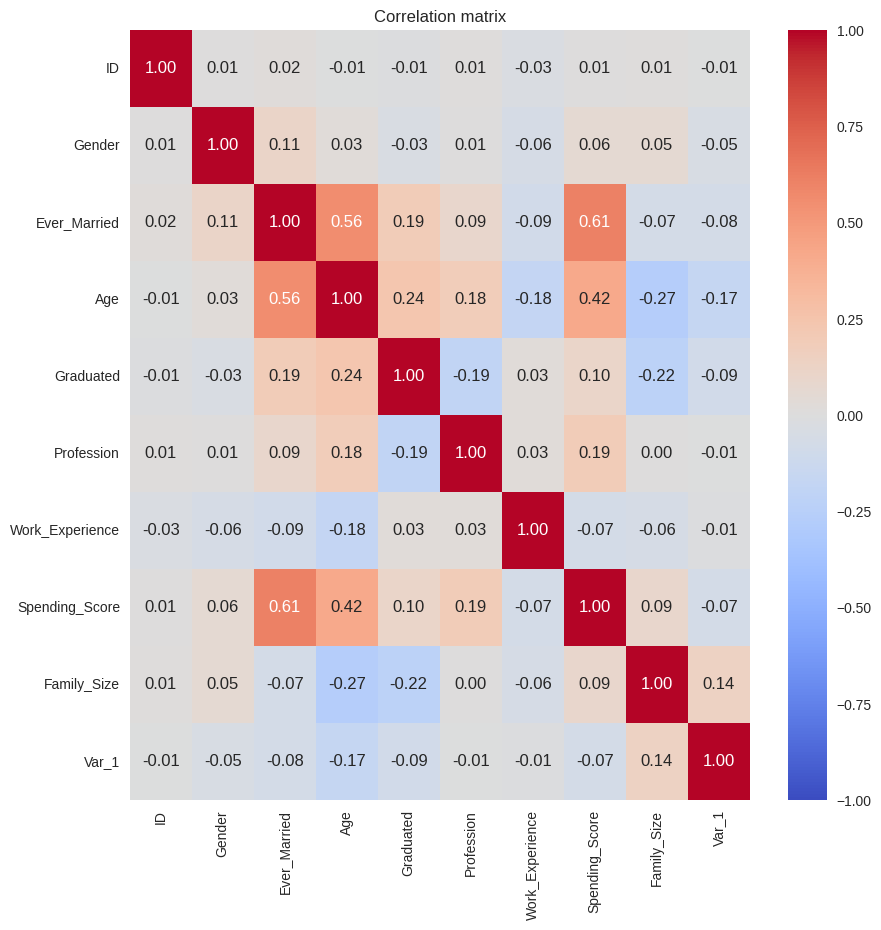

In [239]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm', fmt='.2f')
plt.title("Correlation matrix")

## Метод "локтя"

In [240]:
X = data

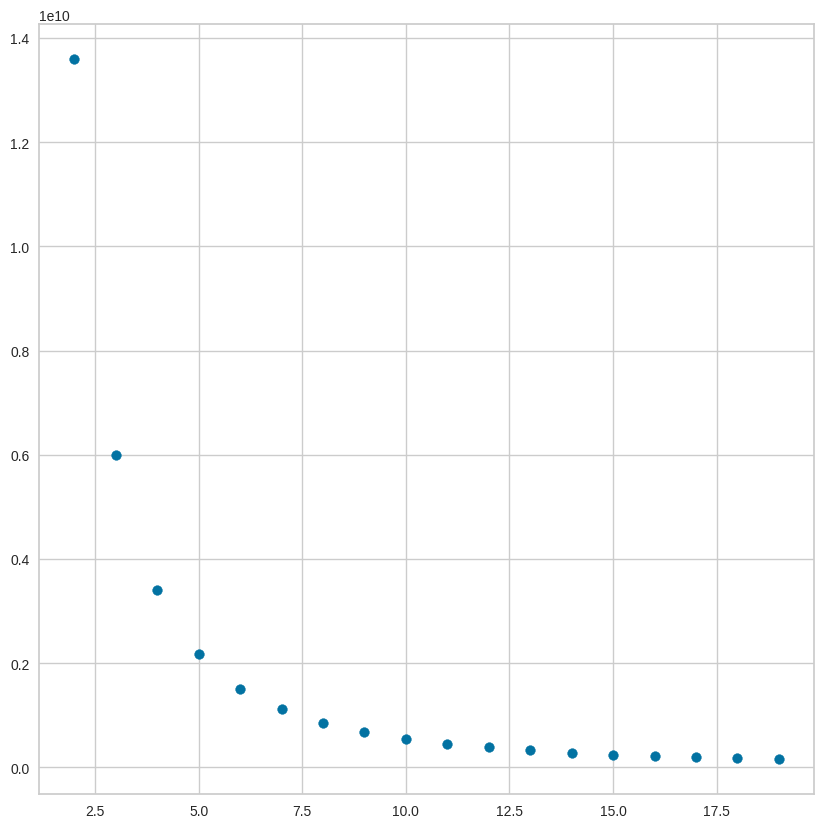

In [241]:
K = range(2, 20)
inertia = []

for k in K:
  model = KMeans(k, n_init="auto")
  model.fit(X)
  inertia.append(model.inertia_)

plt.figure(figsize=(10,10))
plt.scatter(K, inertia)

**Делаем то же самое, но с нормированными данными**

In [242]:
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)

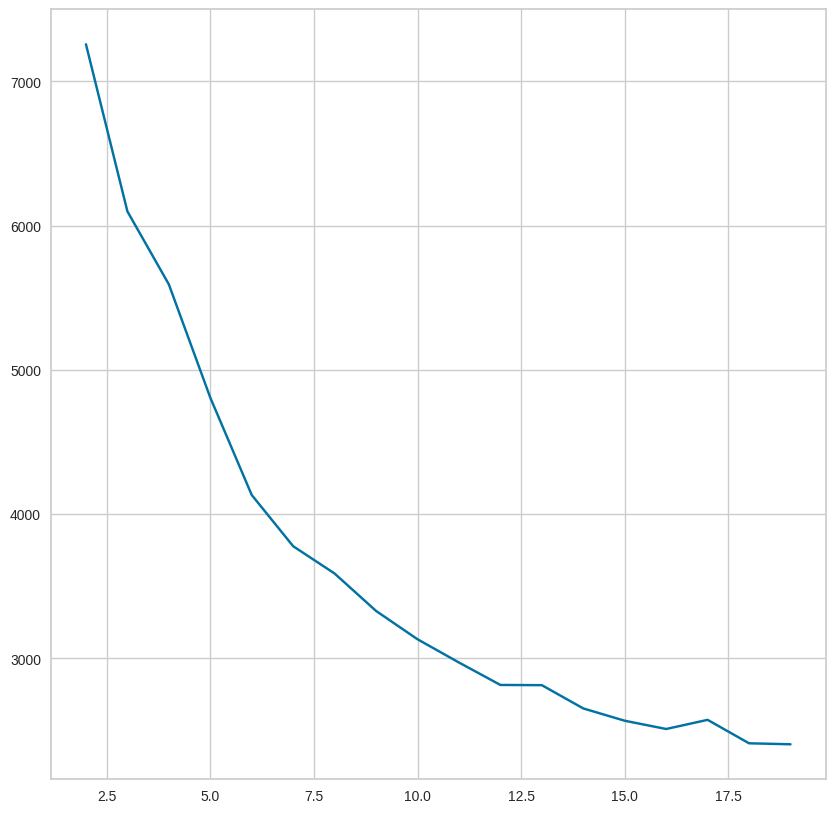

In [243]:
K = range(2, 20)
inertia = []

for k in K:
  model = KMeans(k, n_init="auto")
  model.fit(X_scaled)
  inertia.append(model.inertia_)

plt.figure(figsize=(10,10))
plt.plot(K, inertia)

## "Ножи"

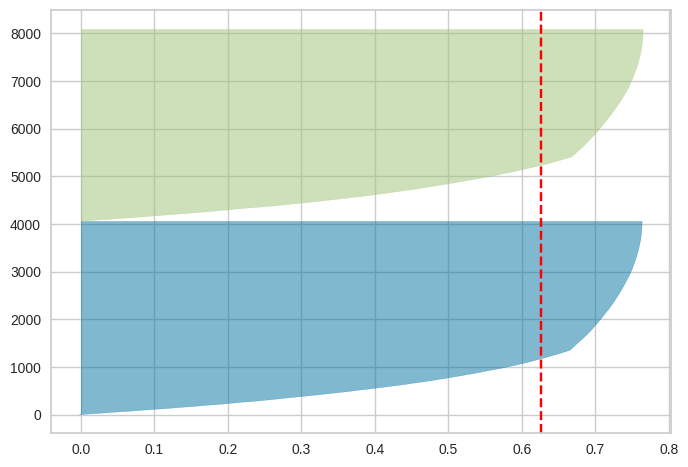

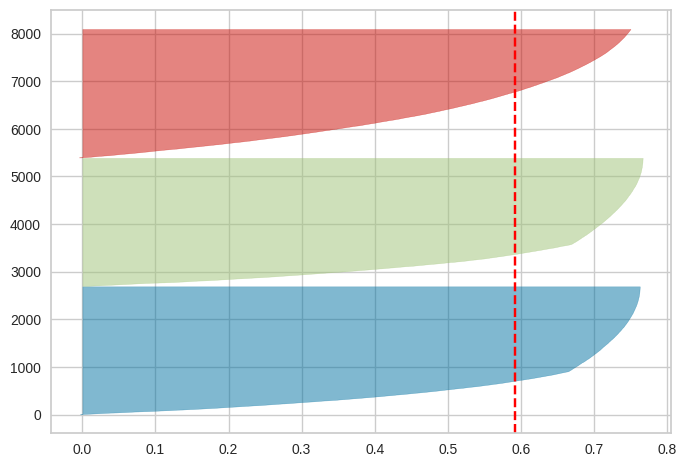

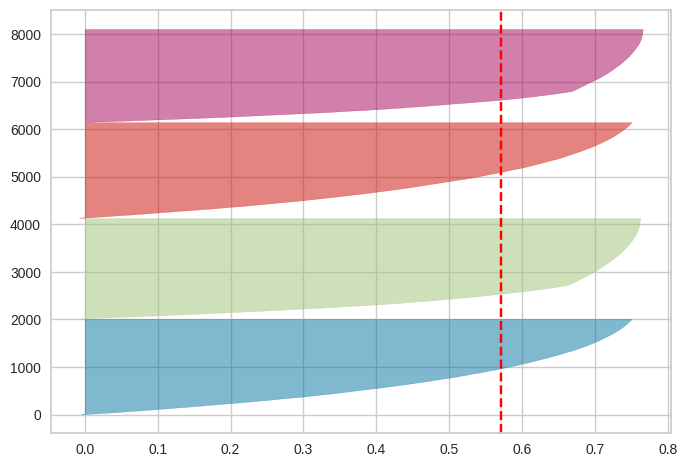

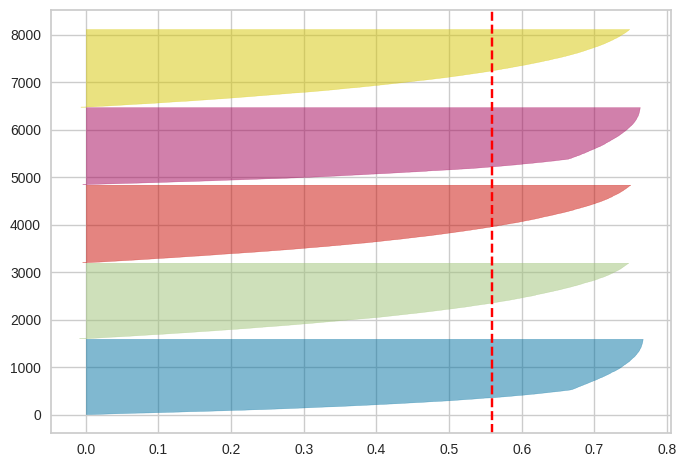

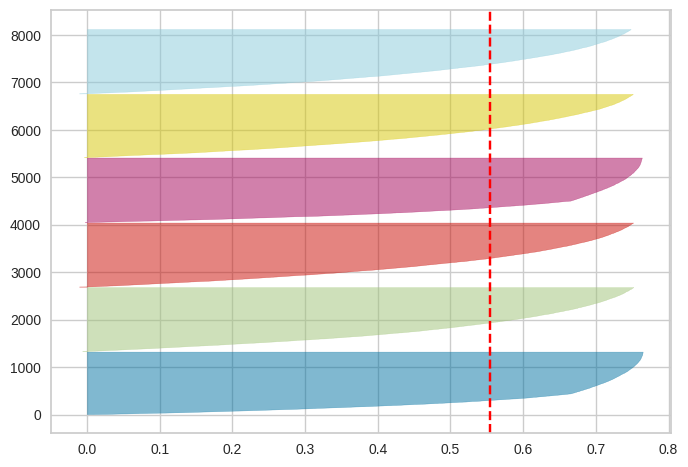

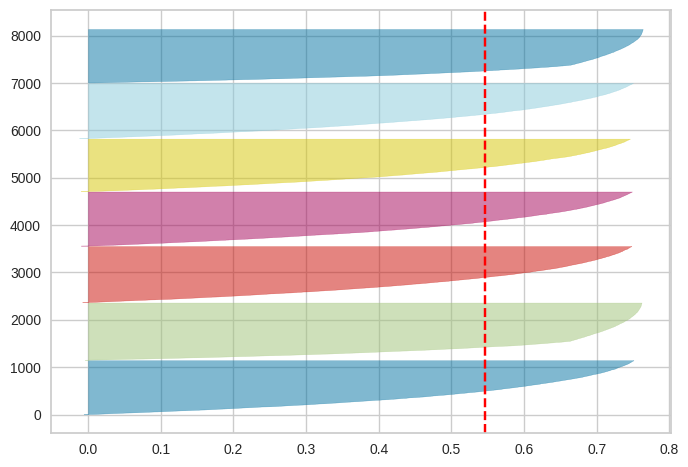

In [244]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in range(2, 8):
    fig, (ax1) = plt.subplots(1)
    km = KMeans(n_clusters = i, n_init="auto")
    visualizer = SilhouetteVisualizer(km, colors = 'yellowbrick', ax = ax1)
    visualizer.fit(X)

## KMeans(4)

/home/yogeny/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

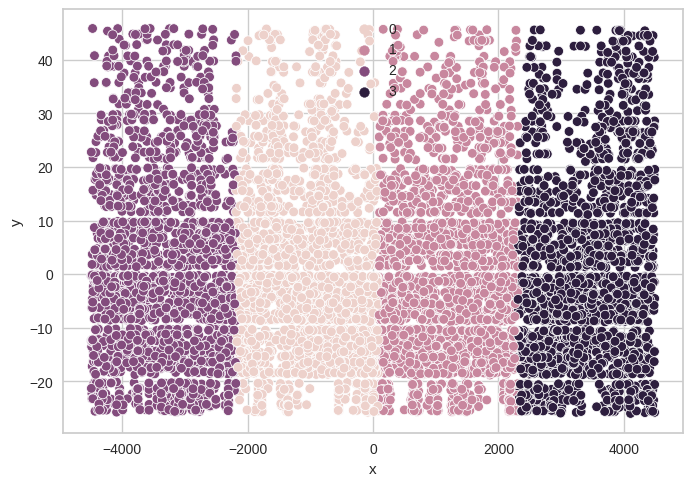

In [245]:
pca = PCA(2)
X_pca1 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model1 = KMeans(4)
pred1 = model1.fit_predict(X_pca1)
sns.scatterplot(data=X_pca1, x='x', y='y', hue=model1.labels_)

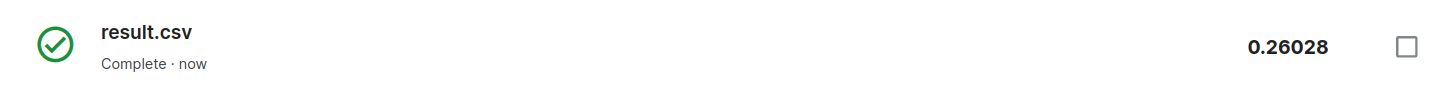

## KMeans(3)

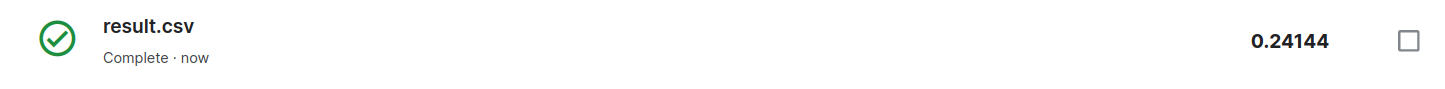

## AgglomerativeClustering(4)

/home/yogeny/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


<AxesSubplot: xlabel='x', ylabel='y'>

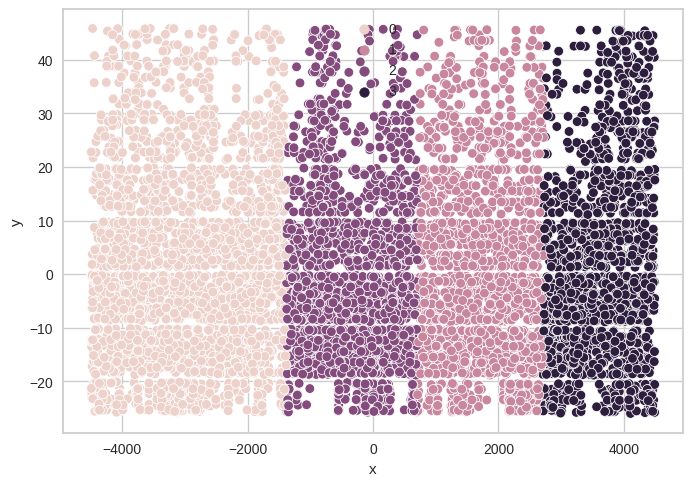

In [246]:
from sklearn.cluster import AgglomerativeClustering

pca = PCA(2)
X_pca2 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model2 = AgglomerativeClustering(4, affinity = 'euclidean', linkage = 'ward')
pred2 = model2.fit_predict(X_pca2)


sns.scatterplot(data=X_pca2, x='x', y='y', hue=model2.labels_)

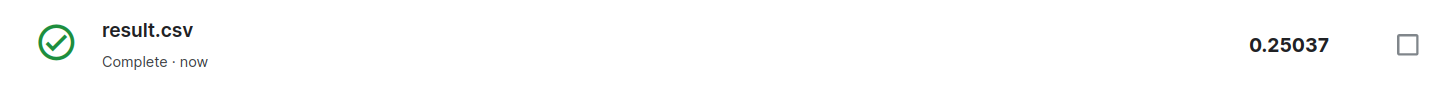

## DBScan

<AxesSubplot: xlabel='x', ylabel='y'>

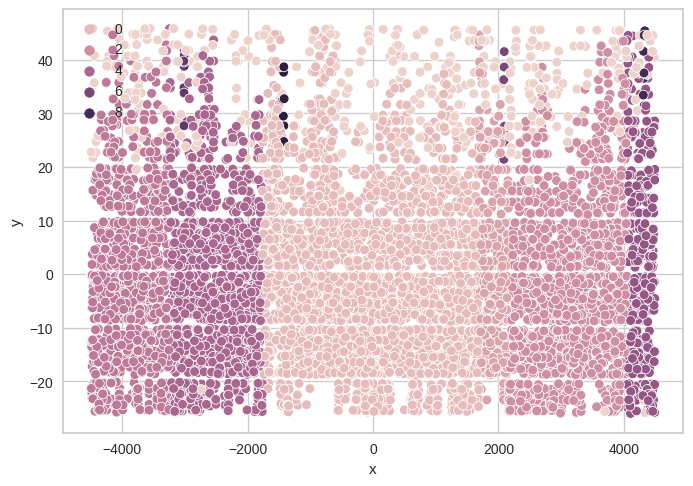

In [258]:
from sklearn.cluster import DBSCAN

pca = PCA(2)
X_pca3 = pd.DataFrame(pca.fit_transform(X), columns=['x', 'y'])
model3 = DBSCAN(eps=17, min_samples = 10)
pred3 = model3.fit_predict(X_pca3)
sns.scatterplot(data=X_pca3, x='x', y='y', hue=model3.labels_)

In [248]:
res = pd.DataFrame({"ID": X["ID"].to_numpy(np.int64), "Segmentation": [p + 1 for p in pred1]})
res.to_csv("result.csv", index=False)
res.head()

,ID,Segmentation
0,462809,2
1,462643,2
2,466315,3
3,461735,2
4,462669,2
